# Importing libraries

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn

# Importing Dataset

In [9]:
df = pd.read_csv('data.csv')

In [10]:
df

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [11]:
df.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [12]:
print(df.isnull().sum().to_markdown())

|                |   0 |
|:---------------|----:|
| age            |   0 |
| workclass      |   0 |
| fnlwgt         |   0 |
| education      |   0 |
| education-num  |   0 |
| marital-status |   0 |
| occupation     |   0 |
| relationship   |   0 |
| race           |   0 |
| sex            |   0 |
| capital-gain   |   0 |
| capital-loss   |   0 |
| hours-per-week |   0 |
| native-country |   0 |
| income         |   0 |


The Dataset has no null values.

# Let's start data cleaning column by column

## Age column

In [13]:
X = df['age'].unique()
X

array([39, 50, 38, 53, 28, 37, 49, 52, 31, 42, 30, 23, 32, 40, 34, 25, 43,
       54, 35, 59, 56, 19, 20, 45, 22, 48, 21, 24, 57, 44, 41, 29, 18, 47,
       46, 36, 79, 27, 67, 33, 76, 17, 55, 61, 70, 64, 71, 68, 66, 51, 58,
       26, 60, 90, 75, 65, 77, 62, 63, 80, 72, 74, 69, 73, 81, 78, 88, 82,
       83, 84, 85, 86, 87])

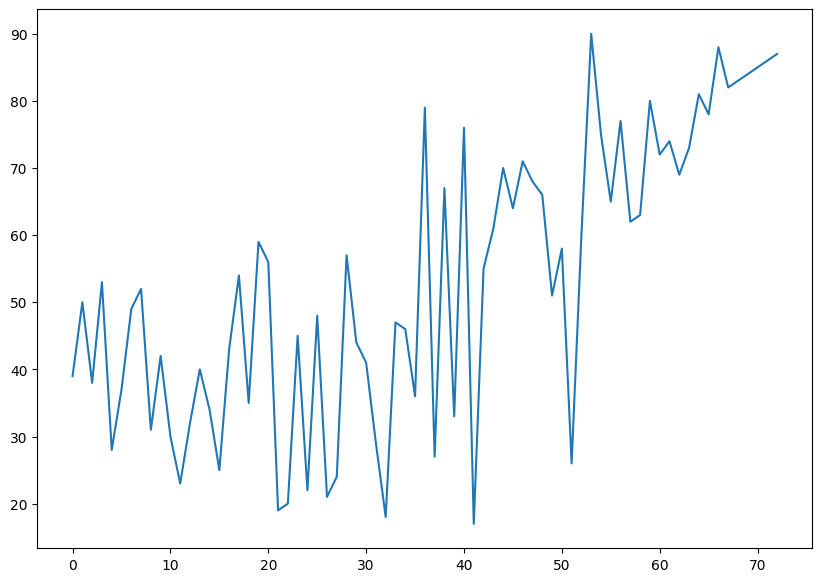

In [14]:
plt.style.use("default")

plt.figure(figsize = (10,7))

plt.plot(X)

plt.show()

In [15]:
print(f"""
  min of age :- {min(X)},
  max of age :- {max(X)}
""")


  min of age :- 17,
  max of age :- 90



## `workclass` column

In [16]:
df['workclass'].unique()

array([' State-gov', ' Self-emp-not-inc', ' Private', ' Federal-gov',
       ' Local-gov', ' ?', ' Self-emp-inc', ' Without-pay',
       ' Never-worked'], dtype=object)

we have an interesting type of workclass which is `?`. This is the representation for Nan values at those locations.

In [17]:
df.workclass[df['workclass'] == ' ?'].count()

1836

we have `1836` values having workclass as ` ?`

In [18]:
df.shape[0]

32561

In [19]:
print((1836 * 100) / 32561)

5.638647461687294


workclass = ` ?`  forms near about 5.6% of the total values, which means removing these values is not the solution for it.

In [20]:
df['workclass'].value_counts()

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: workclass, dtype: int64

Since, workclass consists of categorical features, So, we can replace workclass = ` ?` with workclass = `Private`.

### step 01:- Replacing `?` with `Private`

In [21]:
df['workclass'] = df['workclass'].replace(" ?", " Private")

In [22]:
df['workclass'].value_counts()

 Private             24532
 Self-emp-not-inc     2541
 Local-gov            2093
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: workclass, dtype: int64

we have some extra space in each values of the workclass column in the beginning. We can remove them

### Information about each unique values in the column

In [23]:
col_workclass_info = {
    'Values' : df['workclass'].unique(),
    'Information' : [
        "`Private` in the workclass column of American census data typically refers to employment in a private company or business.",
        "`Self-emp-not-inc` in the workclass column indicates self-employed individuals or independent contractors not incorporated.",
        "`Local-gov` in the workclass column of American census data stands for employment in local government.",
        "`State-gov` in the workclass column of American census data indicates employment in state government positions.",
        "`Self-emp-inc` stands for self-employed individuals with incorporated businesses in the workclass column of census data.",
        "`Federal-gov` in the workclass column of American census data refers to employment in federal government agencies.",
        "`Without-pay` in the workclass column indicates individuals who are not receiving monetary compensation for employment.",
        "`Never-worked` in the workclass column of American census data signifies individuals who have never been employed."
    ]
}

workclass_infomation_df = pd.DataFrame(col_workclass_info, columns = ['Values', "Information"])
print(workclass_infomation_df.to_markdown())

|    | Values           | Information                                                                                                                 |
|---:|:-----------------|:----------------------------------------------------------------------------------------------------------------------------|
|  0 | State-gov        | `Private` in the workclass column of American census data typically refers to employment in a private company or business.  |
|  1 | Self-emp-not-inc | `Self-emp-not-inc` in the workclass column indicates self-employed individuals or independent contractors not incorporated. |
|  2 | Private          | `Local-gov` in the workclass column of American census data stands for employment in local government.                      |
|  3 | Federal-gov      | `State-gov` in the workclass column of American census data indicates employment in state government positions.             |
|  4 | Local-gov        | `Self-emp-inc` stands for self-employed individuals with incor

### Step 02:- Removing the extra space before each of the values.

In [24]:
df['workclass'].str.split(" ")

0               [, State-gov]
1        [, Self-emp-not-inc]
2                 [, Private]
3                 [, Private]
4                 [, Private]
                 ...         
32556             [, Private]
32557             [, Private]
32558             [, Private]
32559             [, Private]
32560        [, Self-emp-inc]
Name: workclass, Length: 32561, dtype: object

In [25]:
df['newwork'] = [i[1] for i in df['workclass'].str.split(" ")]
df['newwork']

0               State-gov
1        Self-emp-not-inc
2                 Private
3                 Private
4                 Private
               ...       
32556             Private
32557             Private
32558             Private
32559             Private
32560        Self-emp-inc
Name: newwork, Length: 32561, dtype: object

### step 03:- Drop the old `workclass` columns

In [26]:
df1 = df.drop(['workclass'], axis = 'columns')

## `fnlwgt` column

In [27]:
len(df1['fnlwgt'].unique())

21648

we have `21648` unique values in `fnlwgt` column

In [28]:
df1['fnlwgt'].dtype

dtype('int64')

For our problem statement, `fnlwgt` column holds no importance. Thus this column can be removed.

### Step 04:- droping `fnlwgt` column

In [29]:
df2 = df1.drop(['fnlwgt'], axis = 'columns')
df2

,age,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income,newwork
0,39,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K,State-gov
1,50,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K,Self-emp-not-inc
2,38,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K,Private
3,53,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K,Private
4,28,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K,Private
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K,Private
32557,40,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K,Private
32558,58,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K,Private
32559,22,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K,Private


## `education` column

In [30]:
df2['education'].dtype

dtype('O')

In [31]:
df2['education'].unique()

array([' Bachelors', ' HS-grad', ' 11th', ' Masters', ' 9th',
       ' Some-college', ' Assoc-acdm', ' Assoc-voc', ' 7th-8th',
       ' Doctorate', ' Prof-school', ' 5th-6th', ' 10th', ' 1st-4th',
       ' Preschool', ' 12th'], dtype=object)

### information about each unique values in the column

In [32]:
col_info_education = {
    'Values':df2['education'].unique(),
    'Details' : ["In American census data, `Bachelors` typically refers to individuals with a bachelor's degree level of education.",
                 "`HS-grad` stands for high school graduate in American census data, indicating completion of secondary education.",
                 "In American census data, `11th` in the education column typically represents completion of the 11th grade.",
                 "In American census data, `Masters` in the education column typically represents a graduate-level academic degree.",
                 "In American census data, `9th` in the education column typically represents completion of the ninth grade.",
                 "`Some-college` in American census data education column typically indicates education beyond high school without completing a degree.",
                 "`Assoc-acdm` stands for Associate degree in the American census data, indicating an academic degree.",
                 "`Assoc-voc` stands for Associate's degree in vocational education in the American census data for education.",
                 "`7th-8th` in American census data's education column typically stands for completion of seventh and eighth grades.",
                 "In American census data, `Doctorate` in the education column indicates the highest academic degree attained.",
                 "`Prof-school` in American census data education column typically stands for Professional School, indicating advanced professional education.",
                 "`5th-6th` in American census data education column typically stands for completion of elementary school grades 5-6.",
                 "In American census data, `10th` in the education column typically represents completion of 10th grade education.",
                 "`1st-4th` in American census education column typically refers to completion of grades one through four.",
                 "In American census data, `Preschool` typically refers to early childhood education programs for young children aged 3-5.",
                 "`12th` typically stands for completion of 12 years of education or high school graduation."
                 ]
}

col_df = pd.DataFrame(col_info_education, columns = ['Values', 'Details'])
print(col_df.to_markdown())

|    | Values       | Details                                                                                                                                      |
|---:|:-------------|:---------------------------------------------------------------------------------------------------------------------------------------------|
|  0 | Bachelors    | In American census data, `Bachelors` typically refers to individuals with a bachelor's degree level of education.                            |
|  1 | HS-grad      | `HS-grad` stands for high school graduate in American census data, indicating completion of secondary education.                             |
|  2 | 11th         | In American census data, `11th` in the education column typically represents completion of the 11th grade.                                   |
|  3 | Masters      | In American census data, `Masters` in the education column typically represents a graduate-level academic degree.                            |
|  4 | 9th

### Step 05:- Removing the extra space which is there in each values

In [33]:
df2['education'] = df2['education'].str.split(" ")
df2['new_edu'] = [i[1] for i in df2['education']]
df2['new_edu'][0]

'Bachelors'

### step 06:- Dropping the old `education` column

In [34]:
df3 = df2.drop(['education'], axis = 'columns')

In [35]:
df3

,age,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income,newwork,new_edu
0,39,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K,State-gov,Bachelors
1,50,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K,Self-emp-not-inc,Bachelors
2,38,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K,Private,HS-grad
3,53,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K,Private,11th
4,28,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K,Private,Bachelors
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K,Private,Assoc-acdm
32557,40,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K,Private,HS-grad
32558,58,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K,Private,HS-grad
32559,22,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K,Private,HS-grad


## `education-num` column

In [36]:
df3['education-num'].unique()

array([13,  9,  7, 14,  5, 10, 12, 11,  4, 16, 15,  3,  6,  2,  1,  8])

In [37]:
df3['education-num'].dtype

dtype('int64')

Keeping either of `education` or `education-num` columns means the same. But for the user it is more easier for him tell his education level instead of telling the number of years of education he has got.

Hence, we can drop the `education-num` column.

### Step 07:- Dropping the `education-num` column

In [38]:
df4 = df3.drop(['education-num'], axis = 'columns')
df4

,age,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income,newwork,new_edu
0,39,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K,State-gov,Bachelors
1,50,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K,Self-emp-not-inc,Bachelors
2,38,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K,Private,HS-grad
3,53,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K,Private,11th
4,28,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K,Private,Bachelors
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K,Private,Assoc-acdm
32557,40,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K,Private,HS-grad
32558,58,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K,Private,HS-grad
32559,22,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K,Private,HS-grad


## `marital-status` column

In [39]:
df4['marital-status'].unique()

array([' Never-married', ' Married-civ-spouse', ' Divorced',
       ' Married-spouse-absent', ' Separated', ' Married-AF-spouse',
       ' Widowed'], dtype=object)

### Step 08:- Removing extra space from all values of the column|

In [40]:
df4['new_marital_status'] = [i[1] for i in df4['marital-status'].str.split(" ")]
df4['new_marital_status']

0             Never-married
1        Married-civ-spouse
2                  Divorced
3        Married-civ-spouse
4        Married-civ-spouse
                ...        
32556    Married-civ-spouse
32557    Married-civ-spouse
32558               Widowed
32559         Never-married
32560    Married-civ-spouse
Name: new_marital_status, Length: 32561, dtype: object

### Information about each value in the column

In [41]:
col_marital_info = {
    'Values' : df4['new_marital_status'].unique(),
    "Information" : ["Individuals who have not been married at the time surveyed.",
                     "Married civilian spouse; typically used in American census data categorization.",
                     "Marital status indicating legal termination of a marriage in census.",
                     "Married, but spouse is not present during census enumeration.",
                     "Living apart from spouse, not divorced, not widowed, census term.",
                     "Married, Armed Forces spouse in American census data (abbreviation).",
                     "Widowed in American census data indicates a person whose spouse died."]
}

df_col_marital_info = pd.DataFrame(col_marital_info, columns = ['Values', 'Information'])
print(df_col_marital_info.to_markdown())

|    | Values                | Information                                                                     |
|---:|:----------------------|:--------------------------------------------------------------------------------|
|  0 | Never-married         | Individuals who have not been married at the time surveyed.                     |
|  1 | Married-civ-spouse    | Married civilian spouse; typically used in American census data categorization. |
|  2 | Divorced              | Marital status indicating legal termination of a marriage in census.            |
|  3 | Married-spouse-absent | Married, but spouse is not present during census enumeration.                   |
|  4 | Separated             | Living apart from spouse, not divorced, not widowed, census term.               |
|  5 | Married-AF-spouse     | Married, Armed Forces spouse in American census data (abbreviation).            |
|  6 | Widowed               | Widowed in American census data indicates a person whose spouse d

### Step 09 :- Dropping the old marital-status column.

In [42]:
df5 = df4.drop(['marital-status'], axis = 'columns')
df5

,age,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income,newwork,new_edu,new_marital_status
0,39,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K,State-gov,Bachelors,Never-married
1,50,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K,Self-emp-not-inc,Bachelors,Married-civ-spouse
2,38,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K,Private,HS-grad,Divorced
3,53,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K,Private,11th,Married-civ-spouse
4,28,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K,Private,Bachelors,Married-civ-spouse
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K,Private,Assoc-acdm,Married-civ-spouse
32557,40,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K,Private,HS-grad,Married-civ-spouse
32558,58,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K,Private,HS-grad,Widowed
32559,22,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K,Private,HS-grad,Never-married


## `Occupation` Column

In [43]:
df5['occupation'].unique()

array([' Adm-clerical', ' Exec-managerial', ' Handlers-cleaners',
       ' Prof-specialty', ' Other-service', ' Sales', ' Craft-repair',
       ' Transport-moving', ' Farming-fishing', ' Machine-op-inspct',
       ' Tech-support', ' ?', ' Protective-serv', ' Armed-Forces',
       ' Priv-house-serv'], dtype=object)

Again we have a different type of occupation which is ' ?'.

This shows that this value is not defined.

In [44]:
df5['occupation'].value_counts()

 Prof-specialty       4140
 Craft-repair         4099
 Exec-managerial      4066
 Adm-clerical         3770
 Sales                3650
 Other-service        3295
 Machine-op-inspct    2002
 ?                    1843
 Transport-moving     1597
 Handlers-cleaners    1370
 Farming-fishing       994
 Tech-support          928
 Protective-serv       649
 Priv-house-serv       149
 Armed-Forces            9
Name: occupation, dtype: int64

### Step 10:- Replacing the `?` with their repective values

In [45]:
df5.occupation = df5.occupation.replace(" ?", " Prof-specialty")

In [46]:
df5[df5.occupation == " ?"].shape[0]

0

### Step 11:- Removing the extra space from the values of the column

In [47]:
df5['new_occupation'] = [i[1] for i in df5.occupation.str.split(" ")]

### step 12 :- Dropping the old occupation columns

In [48]:
df6 = df5.drop(['occupation'], axis = 'columns')

In [49]:
df6

,age,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income,newwork,new_edu,new_marital_status,new_occupation
0,39,Not-in-family,White,Male,2174,0,40,United-States,<=50K,State-gov,Bachelors,Never-married,Adm-clerical
1,50,Husband,White,Male,0,0,13,United-States,<=50K,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial
2,38,Not-in-family,White,Male,0,0,40,United-States,<=50K,Private,HS-grad,Divorced,Handlers-cleaners
3,53,Husband,Black,Male,0,0,40,United-States,<=50K,Private,11th,Married-civ-spouse,Handlers-cleaners
4,28,Wife,Black,Female,0,0,40,Cuba,<=50K,Private,Bachelors,Married-civ-spouse,Prof-specialty
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Wife,White,Female,0,0,38,United-States,<=50K,Private,Assoc-acdm,Married-civ-spouse,Tech-support
32557,40,Husband,White,Male,0,0,40,United-States,>50K,Private,HS-grad,Married-civ-spouse,Machine-op-inspct
32558,58,Unmarried,White,Female,0,0,40,United-States,<=50K,Private,HS-grad,Widowed,Adm-clerical
32559,22,Own-child,White,Male,0,0,20,United-States,<=50K,Private,HS-grad,Never-married,Adm-clerical


### Information about each data values in the column

In [50]:
col_occupation_info = {
    'Values' : df6['new_occupation'].unique(),
    'Information' : [
        "Adm-clerical in American census data refers to administrative and clerical occupations.",
        "Exec-managerial in American census data refers to executive and managerial occupations.",
        "Handlers-cleaners in census data refers to occupations involving cleaning and handling.",
        "Prof-specialty in American census data refers to professional specialty occupations.",
        "Other-service in American census data represents miscellaneous or unspecified service occupations.",
        "In American census data, Sales likely refers to sales occupations.",
        "Craft-repair in census data refers to occupations involving skilled manual work.",
        "Transport-moving in American census data refers to transportation and moving occupations.",
        "Farming-fishing in American census data refers to agricultural and fishing occupations.",
        "Machine-op-inspct in census data refers to machine operation inspector occupations.",
        "Tech-support in American census data signifies employment in technology support services.",
        "Protective-serv in American census data likely refers to protective services.",
        "Armed-Forces in American census data represents military personnel statistics.",
        "Private household services, likely referring to domestic workers or staff.",
    ]
}

occu_col_info_df = pd.DataFrame(col_occupation_info, columns = ['Values', 'Information'])
print(occu_col_info_df.to_markdown())

|    | Values            | Information                                                                                        |
|---:|:------------------|:---------------------------------------------------------------------------------------------------|
|  0 | Adm-clerical      | Adm-clerical in American census data refers to administrative and clerical occupations.            |
|  1 | Exec-managerial   | Exec-managerial in American census data refers to executive and managerial occupations.            |
|  2 | Handlers-cleaners | Handlers-cleaners in census data refers to occupations involving cleaning and handling.            |
|  3 | Prof-specialty    | Prof-specialty in American census data refers to professional specialty occupations.               |
|  4 | Other-service     | Other-service in American census data represents miscellaneous or unspecified service occupations. |
|  5 | Sales             | In American census data, Sales likely refers to sales occupations.           

## `relationship` column

relationships have no relation with your salaries. Hence we can drop them.

### Step 13:- dropping `relationship` column

In [51]:
df7 = df6.drop(['relationship'], axis = 'columns')
df7

,age,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income,newwork,new_edu,new_marital_status,new_occupation
0,39,White,Male,2174,0,40,United-States,<=50K,State-gov,Bachelors,Never-married,Adm-clerical
1,50,White,Male,0,0,13,United-States,<=50K,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial
2,38,White,Male,0,0,40,United-States,<=50K,Private,HS-grad,Divorced,Handlers-cleaners
3,53,Black,Male,0,0,40,United-States,<=50K,Private,11th,Married-civ-spouse,Handlers-cleaners
4,28,Black,Female,0,0,40,Cuba,<=50K,Private,Bachelors,Married-civ-spouse,Prof-specialty
...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,White,Female,0,0,38,United-States,<=50K,Private,Assoc-acdm,Married-civ-spouse,Tech-support
32557,40,White,Male,0,0,40,United-States,>50K,Private,HS-grad,Married-civ-spouse,Machine-op-inspct
32558,58,White,Female,0,0,40,United-States,<=50K,Private,HS-grad,Widowed,Adm-clerical
32559,22,White,Male,0,0,20,United-States,<=50K,Private,HS-grad,Never-married,Adm-clerical


## `race` column

This column too has no relationship with your salaries.

Hence we can drop this column also.

### step 14:- Dropping the race column

In [52]:
df8 = df7.drop(['race'], axis='columns')
df8

,age,sex,capital-gain,capital-loss,hours-per-week,native-country,income,newwork,new_edu,new_marital_status,new_occupation
0,39,Male,2174,0,40,United-States,<=50K,State-gov,Bachelors,Never-married,Adm-clerical
1,50,Male,0,0,13,United-States,<=50K,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial
2,38,Male,0,0,40,United-States,<=50K,Private,HS-grad,Divorced,Handlers-cleaners
3,53,Male,0,0,40,United-States,<=50K,Private,11th,Married-civ-spouse,Handlers-cleaners
4,28,Female,0,0,40,Cuba,<=50K,Private,Bachelors,Married-civ-spouse,Prof-specialty
...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Female,0,0,38,United-States,<=50K,Private,Assoc-acdm,Married-civ-spouse,Tech-support
32557,40,Male,0,0,40,United-States,>50K,Private,HS-grad,Married-civ-spouse,Machine-op-inspct
32558,58,Female,0,0,40,United-States,<=50K,Private,HS-grad,Widowed,Adm-clerical
32559,22,Male,0,0,20,United-States,<=50K,Private,HS-grad,Never-married,Adm-clerical


## `sex` column

This column also has no relation with the salaries of a person. Hence we will drop this column also.

### step 15:- dropping the `sex` column

In [53]:
df9 = df8.drop(['sex'], axis='columns')
df9

,age,capital-gain,capital-loss,hours-per-week,native-country,income,newwork,new_edu,new_marital_status,new_occupation
0,39,2174,0,40,United-States,<=50K,State-gov,Bachelors,Never-married,Adm-clerical
1,50,0,0,13,United-States,<=50K,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial
2,38,0,0,40,United-States,<=50K,Private,HS-grad,Divorced,Handlers-cleaners
3,53,0,0,40,United-States,<=50K,Private,11th,Married-civ-spouse,Handlers-cleaners
4,28,0,0,40,Cuba,<=50K,Private,Bachelors,Married-civ-spouse,Prof-specialty
...,...,...,...,...,...,...,...,...,...,...
32556,27,0,0,38,United-States,<=50K,Private,Assoc-acdm,Married-civ-spouse,Tech-support
32557,40,0,0,40,United-States,>50K,Private,HS-grad,Married-civ-spouse,Machine-op-inspct
32558,58,0,0,40,United-States,<=50K,Private,HS-grad,Widowed,Adm-clerical
32559,22,0,0,20,United-States,<=50K,Private,HS-grad,Never-married,Adm-clerical


## `capital-gain` column

In [54]:
df9['capital-gain'].unique()

array([ 2174,     0, 14084,  5178,  5013,  2407, 14344, 15024,  7688,
       34095,  4064,  4386,  7298,  1409,  3674,  1055,  3464,  2050,
        2176,   594, 20051,  6849,  4101,  1111,  8614,  3411,  2597,
       25236,  4650,  9386,  2463,  3103, 10605,  2964,  3325,  2580,
        3471,  4865, 99999,  6514,  1471,  2329,  2105,  2885, 25124,
       10520,  2202,  2961, 27828,  6767,  2228,  1506, 13550,  2635,
        5556,  4787,  3781,  3137,  3818,  3942,   914,   401,  2829,
        2977,  4934,  2062,  2354,  5455, 15020,  1424,  3273, 22040,
        4416,  3908, 10566,   991,  4931,  1086,  7430,  6497,   114,
        7896,  2346,  3418,  3432,  2907,  1151,  2414,  2290, 15831,
       41310,  4508,  2538,  3456,  6418,  1848,  3887,  5721,  9562,
        1455,  2036,  1831, 11678,  2936,  2993,  7443,  6360,  1797,
        1173,  4687,  6723,  2009,  6097,  2653,  1639, 18481,  7978,
        2387,  5060])

capital-gain column has direct relation with the salary exceeding 50k or not.

A person with higher captial-gain has higher chances for earning more than 50k and vice-versa.

This column is already cleaned. hence it does not need any changes as of now.

## `capital-loss` column

In [55]:
df9['capital-loss'].unique()

array([   0, 2042, 1408, 1902, 1573, 1887, 1719, 1762, 1564, 2179, 1816,
       1980, 1977, 1876, 1340, 2206, 1741, 1485, 2339, 2415, 1380, 1721,
       2051, 2377, 1669, 2352, 1672,  653, 2392, 1504, 2001, 1590, 1651,
       1628, 1848, 1740, 2002, 1579, 2258, 1602,  419, 2547, 2174, 2205,
       1726, 2444, 1138, 2238,  625,  213, 1539,  880, 1668, 1092, 1594,
       3004, 2231, 1844,  810, 2824, 2559, 2057, 1974,  974, 2149, 1825,
       1735, 1258, 2129, 2603, 2282,  323, 4356, 2246, 1617, 1648, 2489,
       3770, 1755, 3683, 2267, 2080, 2457,  155, 3900, 2201, 1944, 2467,
       2163, 2754, 2472, 1411])

This column is also having equal importance as of the capital-gain column.

## `hours-per-week` column

In [56]:
X = df9['hours-per-week'].unique()

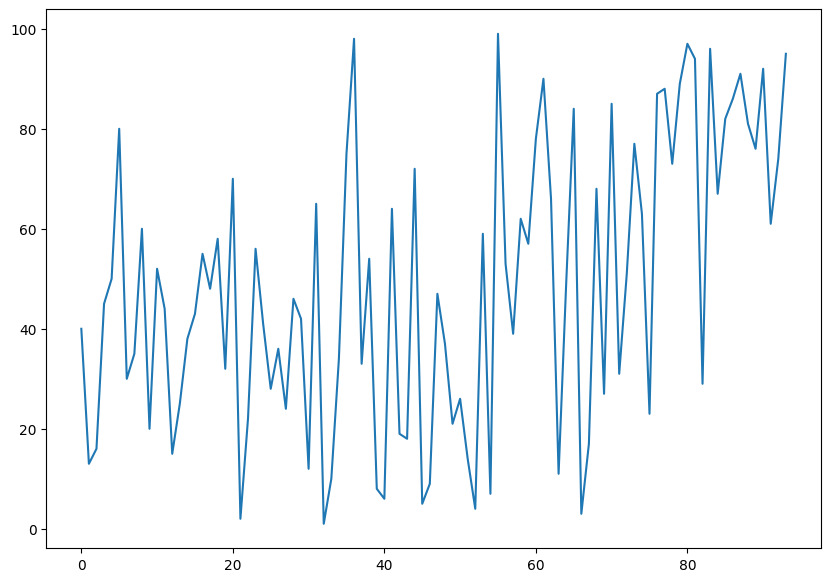

In [57]:
plt.style.use('default')

plt.figure(figsize = (10, 7))

plt.plot(X)

plt.show()

## `native-country` column

Which is your native country doesn't matters when you are living in other nations for job.

Hence we can remove this column also.

In [58]:
df10 = df9.drop(['native-country'], axis = 'columns')

In [59]:
df10

,age,capital-gain,capital-loss,hours-per-week,income,newwork,new_edu,new_marital_status,new_occupation
0,39,2174,0,40,<=50K,State-gov,Bachelors,Never-married,Adm-clerical
1,50,0,0,13,<=50K,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial
2,38,0,0,40,<=50K,Private,HS-grad,Divorced,Handlers-cleaners
3,53,0,0,40,<=50K,Private,11th,Married-civ-spouse,Handlers-cleaners
4,28,0,0,40,<=50K,Private,Bachelors,Married-civ-spouse,Prof-specialty
...,...,...,...,...,...,...,...,...,...
32556,27,0,0,38,<=50K,Private,Assoc-acdm,Married-civ-spouse,Tech-support
32557,40,0,0,40,>50K,Private,HS-grad,Married-civ-spouse,Machine-op-inspct
32558,58,0,0,40,<=50K,Private,HS-grad,Widowed,Adm-clerical
32559,22,0,0,20,<=50K,Private,HS-grad,Never-married,Adm-clerical


## `income` columns

In [60]:
df10['income'].unique()

array([' <=50K', ' >50K'], dtype=object)

### Step 16:-  removing extra space from the values in the column.

In [61]:
df10['income'] = [i[1] for i in df['income'].str.split(" ")]

In [62]:
df10['income'].unique()

array(['<=50K', '>50K'], dtype=object)